In [2]:
import requests
import cache
import importlib
import csv

import numpy as np
import pandas as pd
import altair as alt

import weather

In [3]:
importlib.reload(cache)

<module 'cache' from '/Users/oneoPk/Desktop/Classes/330/final-project/cache.py'>

In [4]:
API_ENDPOINT = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx"

API_KEY = "f46e6eab67824a55a1441132180912"
AA = "Ann Arbor, MI"
MSK = "Minsk, Belarus"

In [5]:
# This function will get daily report for a given month
# returns a json list of dictionaries (days and their weither)
def weather_request_24hr(location, month, year):
    '''
    This function fetches the data for a 24 hr interval for a given city
    that is between the two given dates.
    
    DATE
    If you wish to retrieve weather between two dates, 
    use this  parameter to specify the ending date.
    Important: the enddate parameter must have the same month 
    and year as the date parameter.
        yyyy-MM-dd (Example: 2009-07-20 for 20 July 2009.)
        
    LOCATION
    City Name, State (US only)
    City Name, Country
        q=London,united+kingdom
    '''
    year = str(year)
    date    = year+'-'+month[0]
    enddate = year+'-'+month[1]
    
    
    params = {
        'q': location,
        'date': date,
        'enddate': enddate,
        'tp': 24,
        'key': API_KEY,
        'format': 'json'
    }

    json_obj = cache.cached_reqest(baseurl=API_ENDPOINT,params=params)
    
    return json_obj

In [6]:
# this is the scary function, it will run through every day of the month in given years
# to get daily weather from weather API, then will return data as a list of dictionaries
column_names = ["date","maxtempC","mintempC","precipMM","humidity","cloudcover"]

def get_weather_data(location,years,months,column_names=column_names):
    list_of_days = []
    for year in years:
        for month in months:
            data_month = weather_request_24hr(location, month, year)
            for day in data_month['data']['weather']:
                data = [day['date'],day['maxtempC'],day['mintempC'],day['hourly'][0]['precipMM'],day['hourly'][0]['humidity'],day['hourly'][0]['cloudcover']]
                dict_row = dict(zip(column_names,data))
                list_of_days.append(dict_row)
                
    return list_of_days

In [7]:
# takes list of days (given by get_weather_data() functions )
# and outputs them to a csv file
def dump_to_csv(csv_name, rows, column_names):       
    with open(csv_name, 'w') as new_file:
        writer = csv.DictWriter(new_file, fieldnames=column_names)
        writer.writeheader()
        
        for row in rows:
            writer.writerow(row)

In [8]:
# this are the date blocks to fetch
april     = ['04-15','04-30']
may       = ['05-01','05-31']
june      = ['06-01','06-30']
july      = ['07-01','07-31']
august    = ['08-01','08-31']
september = ['09-01','09-30']
months = [april,may,june,july,august,september]

# this are years to get from the API
years = [2015,2016,2017,2018]

In [9]:
column_names = ["date","maxtempC","mintempC","precipMM","humidity","cloudcover"]


# getting the weather data for Ann Arbor(AA) and Minsk(MSK)
weather_aa  = get_weather_data(AA,years,months,column_names)
weather_msk = get_weather_data(MSK,years,months,column_names)

# exporting to CSV
# dump_to_csv('ann-arbor-weather.csv',weather_aa,column_names)
# dump_to_csv('minsk-weather.csv',weather_msk,column_names)

In [10]:
df_aa  = pd.DataFrame(weather_aa)
df_msk = pd.DataFrame(weather_msk)

df_aa.head()

,cloudcover,date,humidity,maxtempC,mintempC,precipMM
0,7,2015-04-15,54,16,6,0.0
1,88,2015-04-16,85,17,7,3.9
2,27,2015-04-17,73,23,9,0.0
3,9,2015-04-18,61,20,14,0.0
4,74,2015-04-19,72,14,7,8.2


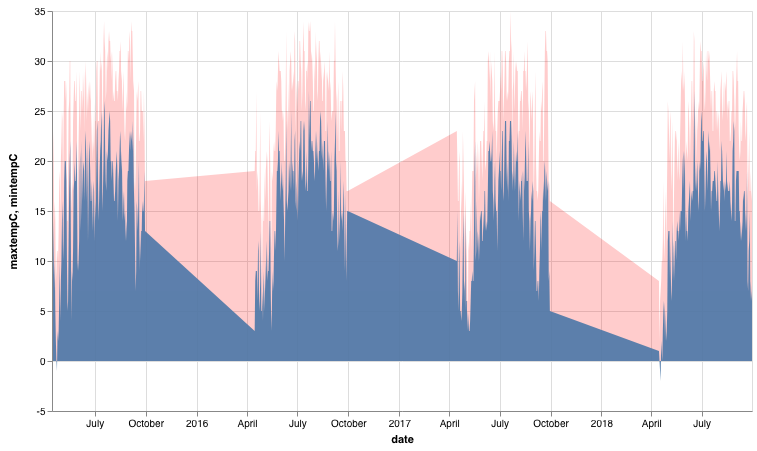

In [28]:
temperature_max_plot = alt.Chart(df_aa).encode(
    x='date:T',
    y='maxtempC:Q'
)

temperature_min_plot = alt.Chart(df_aa).encode(
    x='date:T',
    y='mintempC:Q'
)

humidity = alt.Chart(df_aa).encode(
    x='date:T',
    y='humidity:Q'
)

min_max = temperature_max_plot.mark_area(opacity=0.2, color='red')\
+temperature_min_plot.mark_area(opacity=0.9)

min_max.properties(width=700, height=400).interactive()


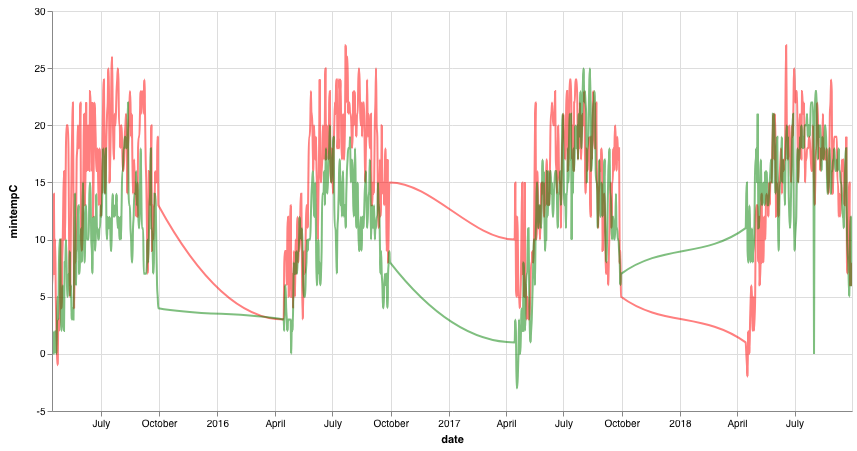

In [51]:
temperature_max_plot_aa = alt.Chart(df_aa).encode(
    x='date:T',
    y='mintempC:Q'
)

temperature_max_plot_msk = alt.Chart(df_msk).encode(
    x='date:T',
    y='mintempC:Q'
)

aa_msk_max = temperature_max_plot_aa.mark_line(opacity=0.5, color='red',interpolate='monotone')\
+temperature_max_plot_msk.mark_line(opacity=0.5, color='green',interpolate='monotone')

aa_msk_max.properties(width=800, height=400).interactive()


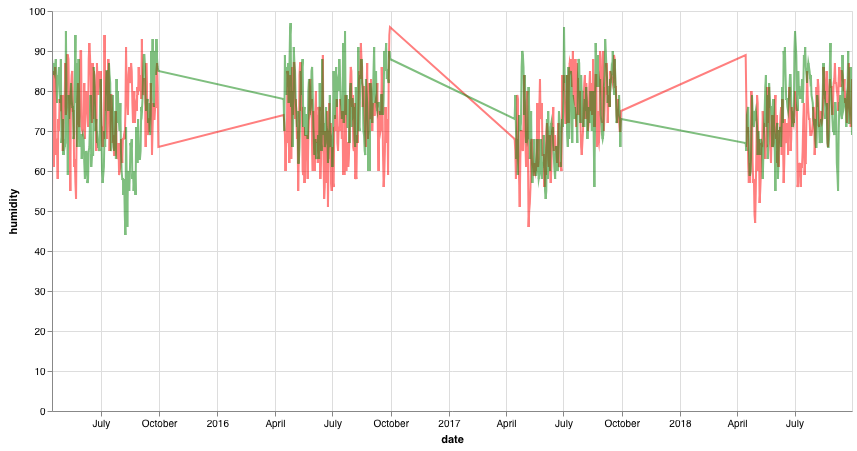

In [50]:
humidity_max_plot_aa = alt.Chart(df_aa).encode(
    x='date:T',
    y='humidity:Q'
)

humidity_max_plot_msk = alt.Chart(df_msk).encode(
    x='date:T',
    y='humidity:Q'
)

aa_msk_max = humidity_max_plot_aa.mark_line(opacity=0.5, color='red')\
+humidity_max_plot_msk.mark_line(opacity=0.5, color='green')

aa_msk_max.properties(width=800, height=400).interactive()
